## 1. First order equation
----

Графики для построения кинетик

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

from scipy.stats import linregress
from sklearn.metrics import r2_score
import seaborn as sns


In [ ]:
import scienceplots
# use science style 
plt.style.use(['science', 'no-latex', 'russian-font'])

sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size':16})

In [ ]:
LANGUAGE = "RU"

5
12
22
42
71
107
161


/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/227040840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/227040840.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element['hours'] = element['days']*24


<matplotlib.collections.PathCollection>

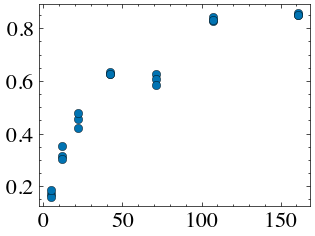

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)


element = df.loc[mask]
start_timestep  = element['days'].unique()[0]
element.loc[:, 'lnC0_Ct'] = np.nan
for day in element['days'].unique():
    initC0 = element.loc[element['days']==start_timestep, 'value']
    timestep = element.loc[element['days']==day, 'value']
    element.loc[element['days']==day, 'lnC0_Ct'] = np.log(initC0.values / timestep.values)
    print(day)

element['hours'] = element['days']*24


mask = (df['variable']=='Si') & (df['parameter']=='Oxalic')
t= df.loc[mask, 'days'].values
A= df.loc[mask, 'value'].values
plt.scatter(t,A, edgecolors='black', linewidth=0.3)

In [ ]:
def get_ln(element: pd.DataFrame)->pd.DataFrame:
    start_timestep  = element['days'].unique()[0]
    element.loc[:, 'lnC0_Ct'] = np.nan
    for day in element['days'].unique():
        initC0 = element.loc[element['days']==start_timestep, 'value']
        timestep = element.loc[element['days']==day, 'value']
        element.loc[element['days']==day, 'lnC0_Ct'] = np.log(initC0.values / timestep.values)
    return element

In [ ]:
def get_plot(element:pd.DataFrame, acid: str, el: str):
        dict_hours = {'RU': '$t, ч$', 'EN': '$t, hours$'}
        mask = (element['days']>6)&(element['days']<71)
        element.loc[:, 'hours'] = element.loc[:, 'days']*24
        t = element.loc[mask, 'hours'].values
        A = element.loc[mask, 'lnC0_Ct'].values
#         coef = np.polyfit(t , A, 1)
#         func = np.poly1d(coef)
        slope, intercept, r, p, se = linregress(t, A)
    
        slopes = {"Oxalic": -0.00094,
                 "Hydrochloric": -0.00082,
                 "Benzoic": -0.00089}
        if acid in slopes:
            slope = slopes[acid]
        func = np.poly1d((slope, intercept))
        fig, ax = plt.subplots(1,1, figsize=(8,6))
        ax.scatter(t,A, s=100, edgecolors='black', linewidth=1)
        
        
        acid_namer = {'Hydrochloric': 'HCl', 
                  'Oxalic':'Щавелевая', 
                  'Citric':'Лимонная', 
                  'Salicylic': 'Салициловая', 
                  'Benzoic': 'Бензойная'}
        acid_name = acid
        if LANGUAGE=='RU':
            acid_name  = acid_namer[acid]
        

        ax.plot(t , func(t), label = f"{el} - {acid_name}", linewidth=3 )
        slopes = {"Oxalic": -0.00094,
                 "Hydrochloric": -0.00082,
                 "Benzoic": -0.00089}
        if acid in slopes:
            slope = slopes[acid]
        ax.set_title(f'$R^2$: {r**2:.2f},    $k$: {slope:.5f},    $b$: {intercept:.3f}')
        ax.legend(frameon=True)
        ax.grid()
        ax.set_ylabel('$ln(C_0/C_t$)')
        ax.set_xlabel(dict_hours[LANGUAGE])
        plt.savefig(f'../plots/kinetic_{el}_{acid}_{LANGUAGE}.png', dpi=300)
        plt.show()

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/806344139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/2924851846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'hours'] = element.loc[:, 'days']*24


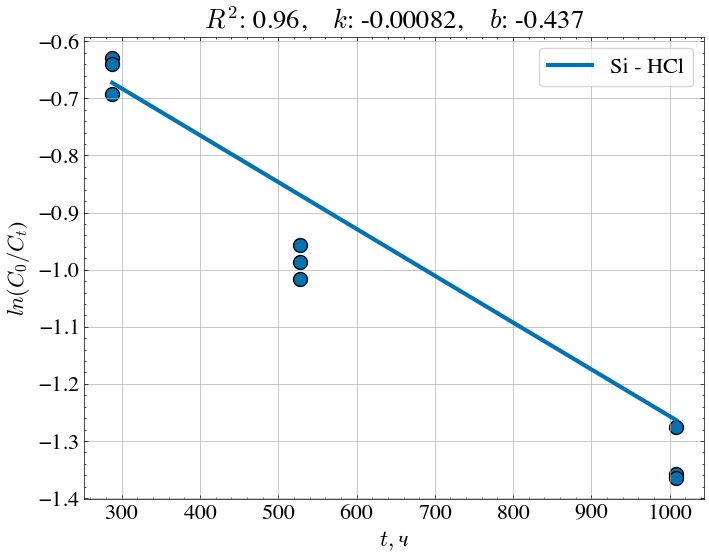

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/806344139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/2924851846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'hours'] = element.loc[:, 'days']*24


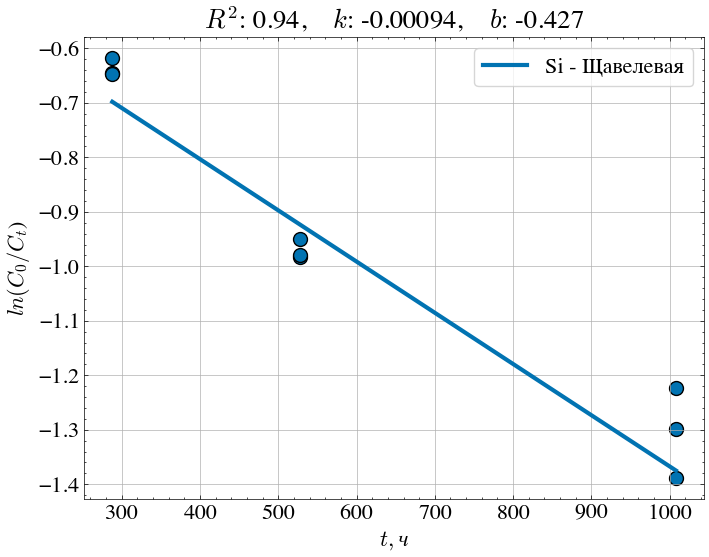

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/806344139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/2924851846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'hours'] = element.loc[:, 'days']*24


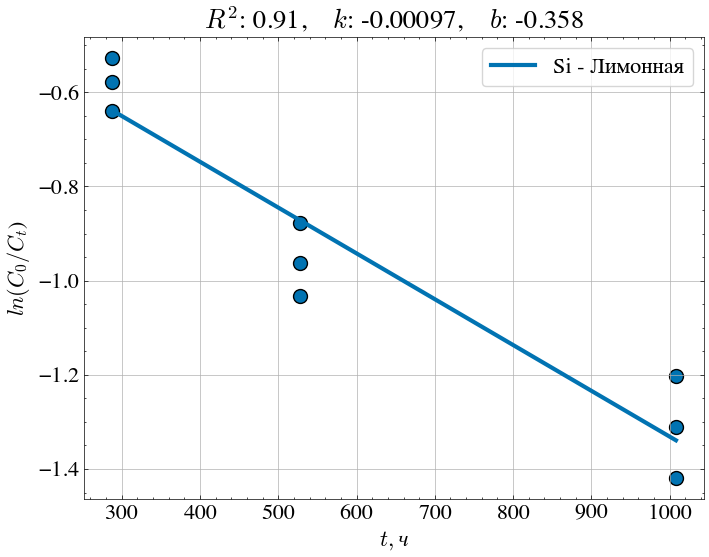

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/806344139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/2924851846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'hours'] = element.loc[:, 'days']*24


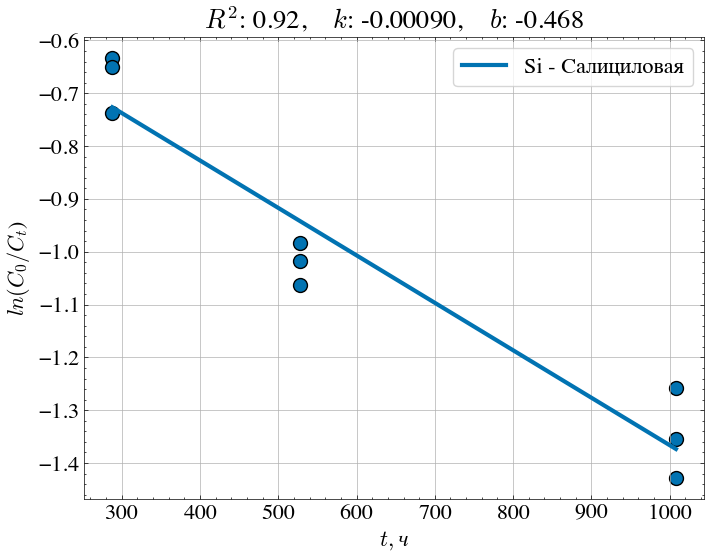

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/806344139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'lnC0_Ct'] = np.nan
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20367/2924851846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  element.loc[:, 'hours'] = element.loc[:, 'days']*24


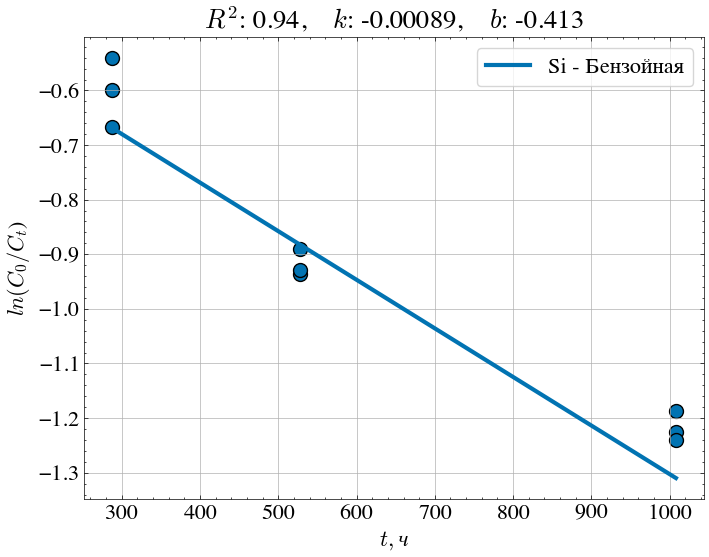

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
# for element in df['variable'].unique():
for element in ['Si']:
    for acid in df['parameter'].unique():
        mask = (df['variable']==element) & (df['parameter']==acid)
        select = get_ln(df.loc[mask])
        get_plot(element=select, acid=acid, el=element)

In [ ]:
from scipy.stats import linregress
from sklearn.metrics import r2_score
mask = (element['days']>6)&(element['days']<71)
t= element.loc[mask, 'hours'].values
A= element.loc[mask, 'lnC0_Ct'].values

coef = np.polyfit(t , A, 1)
func = np.poly1d(coef)
slope, intercept, r, p, se = linregress(t, A)
func = np.poly1d((slope, intercept))
plt.scatter(t,A)
plt.plot(t , func(t))
plt.title(f'$R^2$: {r**2:.2f},    $k$: {slope:.5f},    $b$: {intercept:.3f}')
# plt.legend()
# print(r)
plt.grid()
plt.savefig('../plots/kinetic_1_order_Si.png', dpi=300)
plt.show()

TypeError: string indices must be integers

In [ ]:
r2_score(func(t), )

-839883.9498044105

In [ ]:
element.loc[initC0_mask, 'value'].values/ element.loc[timestep_mask, 'value'].values

array([0.20074021, 0.18471099, 0.21687657])

In [ ]:
for window in df.loc[mask].rolling(window=3, min_periods=1):

    print(window)
    break

    parameter  days        kind variable     value
528    Oxalic     5  experiment       Si  0.170464


In [ ]:
init_days = df.loc[mask,'days']==5
step_days = df.loc[mask,'days']==12
df.loc[mask].loc[step_days, 'value'] - df.loc[mask].loc[init_days, 'value']

528   NaN
529   NaN
530   NaN
543   NaN
544   NaN
545   NaN
Name: value, dtype: float64

$$A = A_0 * exp(-(k_1 + k_2) * t) $$
$$B = \frac{k_1}{k_1+k_2} * (A_0-A))$$ 

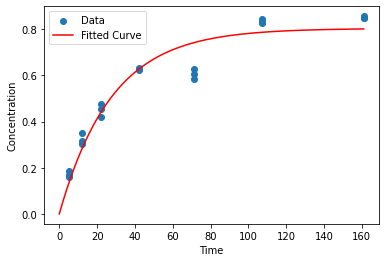

Fitted Rate Constant (k 1): 0.018527303210123656
Fitted Rate Constant (k 2): 0.017501695431421587
Fitted Initial Concentration (A0): 1.5630002224001638


In [ ]:

# Define the second-order kinetics function
def first_order_kinetics(t, k1,k2, A0):
    A = A0 * np.exp(-(k1+k2)*t) # t/1000.
    B = (k1/(k1+k2)) * (A0 - A)
    return B

# Generate example data
# t = np.array([0, 1, 2, 3, 4, 5])  # Time points
# A = np.array([1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125])  # Concentrations at each time point

# Fit the data to the second-order kinetics function
initial_guess = (0.3, 0.1, 2)  # Initial guess for k and A0
params, covariance = curve_fit(first_order_kinetics, t, A, p0=initial_guess)

# Extract the fitted parameters
k_1_fit, k_2_fit, A0_fit = params

# Calculate the fitted curve
t_fit = np.linspace(0, max(t),1000)
A_fit = first_order_kinetics(t_fit, k_1_fit, k_2_fit, A0_fit)

biotite = A0_fit * np.exp(-(k_1_fit+k_2_fit)*t_fit/1000.)

# Plot the original data and the fitted curve
plt.scatter(t, A, label='Data')
# plt.plot(t_fit, biotite)
plt.plot(t_fit, A_fit, label='Fitted Curve', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Fitted Rate Constant (k 1): {k_1_fit}")
print(f"Fitted Rate Constant (k 2): {k_2_fit}")
print(f"Fitted Initial Concentration (A0): {A0_fit}")


In [ ]:
A

array([0.17046429, 0.15817857, 0.1845    , 0.31617857, 0.30178571,
       0.35207143, 0.45589286, 0.42085714, 0.47717857, 0.62464286,
       0.63421429, 0.62746429, 0.62614286, 0.60796429, 0.58442857,
       0.84303571, 0.8265    , 0.83042857, 0.84917857, 0.85635714,
       0.85071429])

## 2. Fitting a Michaelis-Menten model to biochemical kinetics data

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Si') & (df['parameter']=='Oxalic')
t= df.loc[mask, 'days']
A= df.loc[mask, 'value']

In [ ]:
def v(s, v_max, k_m):
    return (v_max * s) / (k_m + s)
def pfo(t, a, b):
    return a*(1 - np.exp(-b*t))

def pso(x, a, b):
    return ((a*(b**2))*x)/(1 + (a*b)*x)

Let's assume we are measuring reaction rate $v$ as a function of substrate concentration $[S]$ under a simple Michaelis-Menten model:

$$ v = \frac{V_{max}[S]}{K_M + [S]} $$

In [ ]:
data = np.array([[3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 0],
                 [0.004407692, 0.004192308, 0.003553846, 0.002576923, 0.001661538, 0.001064286, 0.004835714, 0.004671429, 0.0039, 0.002857143, 0.00175, 0.001057143, 0.004907143, 0.004521429, 0.00375, 0.002764286, 0.001857143, 0.001121429, 0]]).T

v_real = A.values
s_real = t.values
# data

def loss(theta):
    v_max, k_m = theta
    v_pred = v(s_real, v_max, k_m)
    return np.sum((v_real - v_pred)**2)

res = minimize(loss, [1, 0.1])
v_max, k_m = res.x

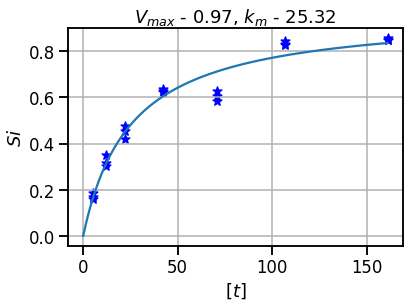

In [ ]:
plt.scatter(s_real, v_real, marker='*', c='b')
s_plot = np.linspace(0, max(s_real), 100)
plt.plot(s_plot, v(s_plot, res.x[0], res.x[1]))
plt.title(f'$V_{{max}}$ - {v_max:.2f}, $k_m$ - {k_m:.2f}')
# plt.xlim([0, 4])
# plt.ylim([0, 0.006])
plt.grid()
plt.xlabel('$[t]$')
plt.ylabel('$Si$')
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint

# k=1.# reaction rate constant
# c0=1.# initial concentration

# def dc_dt(c, t):
#     return -k*c

# t_array = np.linspace(0, 10, 1000)
# c_array = odeint(dc_dt, c0, t_array)

# plt.plot(t_array, c_array)
# plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 50
    # variables        = 9
    chi-square         = 20.6930821
    reduced chi-square = 0.50470932
    Akaike info crit   = -26.1111780
    Bayesian info crit = -8.90297095
[[Variables]]
    a:   0.71720406 +/- 0.58244361 (81.21%) (init = 1)
    a1:  1.67756782 +/- 0.55539441 (33.11%) (init = 0.5)
    b:   2.4329e-04 +/- 0.28833428 (118512.38%) (init = 0)
    c:   0.56833702 +/- 0.46332617 (81.52%) (init = 0)
    d:   0.44668998 +/- 0.67747971 (151.67%) (init = 0)
    k1:  1.03923395 +/- 1.81290337 (174.45%) (init = 1)
    k2:  0.60058374 +/- 0.67617553 (112.59%) (init = 0.8)
    k3:  0.50481132 +/- 0.06452841 (12.78%) (init = 0.7)
    k4:  0.17984980 +/- 0.03816870 (21.22%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(d, k4)  = -0.645
    C(a, a1)  = -0.479
    C(a, b)   = 0.466
    C(k3, k4) = 0.444
    C(a1, b)  = 0.441
    C(k1, k2) = -0.434
    C

/Users/mikhailgasanov/geo/lib/python3.8/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


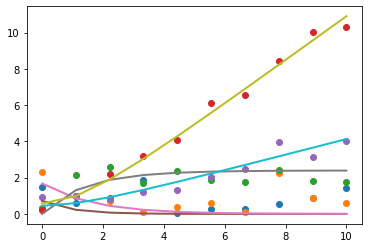

In [ ]:
from scipy.integrate import odeint
import numpy as np
from lmfit import minimize, Parameters, report_fit
import matplotlib.pyplot as plt

time = 10
Nt = 10


tt = np.linspace(0,time, Nt)    


from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np

def f(xs, t, ps):
    """Test"""
    try:
        k1 = ps['k1'].value
        k2 = ps['k2'].value
        k3 = ps['k3'].value
        k4 = ps['k4'].value
    except:
        k1, k2, k3, k4 = ps

    a, a1, b, c, d = xs
    return [-k1*a,-k2*a1, k1*a + k2*a1, k3*b, k4*b]

def g(t, x0, ps):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    x0 = ps['a'].value, ps['a1'].value, ps['b'].value, ps['c'].value, ps['d'].value
    model = g(ts, x0, ps)
    return (model - data).ravel()

x0 = np.array([1,0.5,0,0,0])

k1, k2, k3, k4 = 1,0.8,0.7,0.2
true_params = np.array((k1,k2,k3,k4))
data = g(tt, x0, true_params)

data += np.abs(np.random.normal(size=data.shape))
lb, ub = 0.2, 0.2

# set parameters incluing bounds
params = Parameters()
params.add('a', value = x0[0] , min=0, max=1.5)
params.add('a1', value = x0[1], min=0, max=2.5)
params.add('b', value = x0[2], min=0, max=1)
params.add('c', value= x0[3] , min=0, max=1)
params.add('d', value= x0[4] , min=0, max=1)
params.add('k1', value=k1, min=k1 - lb, max=k1 + ub)
params.add('k2', value=k2, min=k2 - lb, max=k2 + ub)
params.add('k3', value=k3, min=k3 - lb, max=k3 + ub)
params.add('k4', value=k4, min=k4 - lb, max=k4 + ub)

# fit model and find predicted values
result = minimize(residual, params, args=(tt, data), method='leastsq')
final = data + result.residual.reshape(data.shape)

# plot data and fitted curves
plt.plot(tt, data, 'o')
plt.plot(tt, final, '-', linewidth=2);

# display fitted statistics
report_fit(result)

problem = {
    'num_vars': 4,
    'names': ['k1', 'k2', 'k3', 'k4'],
    'bounds': [[(result.params['k1'].value) - 0.2, (result.params['k1'].value) + 0.2],
               [(result.params['k2'].value) - 0.2, (result.params['k2'].value) + 0.2],
               [(result.params['k3'].value) - 0.2, (result.params['k3'].value) + 0.2],
               [(result.params['k4'].value) - 0.2, (result.params['k4'].value) + 0.2]]
}
param_values = saltelli.sample(problem, 1000, calc_second_order=True)

N = len(param_values) # number of parameter samples
# Y = np.zeros(N)
# #
# for i in range(N):
#     Y[i] = g(tt, x0, param_values[i])

# Si = sobol.analyze(problem,Y, print_to_console=False)


Y = []
for i in range(N):
    Y.append((g(tt,x0,(param_values[i]))))
a = np.concatenate(Y, axis=None)

Si = sobol.analyze(problem, a, print_to_console=False)

## 3. GPT chat

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Si') & (df['parameter']=='Oxalic')
t= df.loc[mask, 'days']
A= df.loc[mask, 'value']

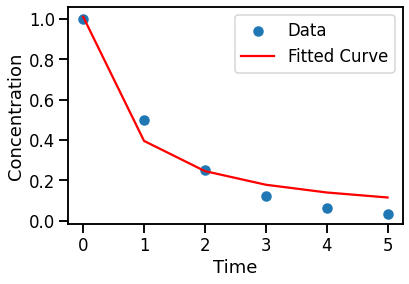

Fitted Rate Constant (k): 1.537617441310179
Fitted Initial Concentration (A0): 1.011920930414205


In [ ]:

# Define the second-order kinetics function
def second_order_kinetics(t, k, A0):
    return 1 / (1 / A0 + k * t)


def first_order_kinetics(t, k, A0):    
    return A0 * np.exp(-k * t)

# Generate example data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
A = np.array([1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125])  # Concentrations at each time point

# Fit the data to the second-order kinetics function
initial_guess = (0.3, 0.1)  # Initial guess for k and A0
params, covariance = curve_fit(second_order_kinetics, t, A, p0=initial_guess)

# Extract the fitted parameters
k_fit, A0_fit = params

# Calculate the fitted curve
A_fit = second_order_kinetics(t, k_fit, A0_fit)

# Plot the original data and the fitted curve
plt.scatter(t, A, label='Data')
plt.plot(t, A_fit, label='Fitted Curve', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Fitted Rate Constant (k): {k_fit}")
print(f"Fitted Initial Concentration (A0): {A0_fit}")


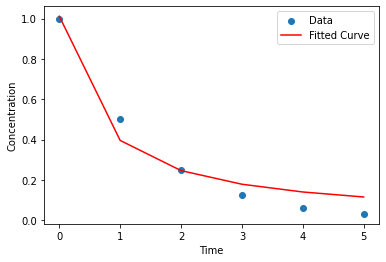

Fitted Rate Constant (k): 1.5376159543953356
Fitted Initial Concentration (A0): 1.0119207576330402


In [ ]:

# Define the second-order kinetics function
def second_order_kinetics(t, k, A0):
    return 1 / (1 / A0 + k * t)

# Generate example data
t = np.array([0, 1, 2, 3, 4, 5])  # Time points
A = np.array([1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125])  # Concentrations at each time point

# Fit the data to the second-order kinetics function
initial_guess = (1.0, 1.0)  # Initial guess for k and A0
params, covariance = curve_fit(second_order_kinetics, t, A, p0=initial_guess)

# Extract the fitted parameters
k_fit, A0_fit = params

# Calculate the fitted curve
A_fit = second_order_kinetics(t, k_fit, A0_fit)

# Plot the original data and the fitted curve
plt.scatter(t, A, label='Data')
plt.plot(t, A_fit, label='Fitted Curve', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Fitted Rate Constant (k): {k_fit}")
print(f"Fitted Initial Concentration (A0): {A0_fit}")


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
from scipy.stats import linregress as lreg

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth']=1
plt.rcParams['figure.dpi']=150
plt.rcParams["legend.edgecolor"] = 'black'
Kn_model = ''

def pfo(t, a, b):
    pfo.has_been_called = True
    return a*(1 - np.exp(-b*t))

def pso(x, a, b):
    pso.has_been_called = True
    return ((a*(b**2))*x)/(1 + (a*b)*x)

def elovich(x, a, b):
    elovich.has_been_called = True
    return (1/b)*np.log(1 + a*b*x)

def sips(x, a, b, c):
    sips.has_been_called = True
    return a*(b*x)**(1/c)/(1+ (b*x)**(1/c))

def temkin(x, a, b):
    temkin.has_been_called = True
    return b*np.log(a*x)

def dubinin_r(x, a, b):
    dubinin_r.has_been_called = True
    T = 298
    R = 8.314
    return a*np.exp(-b*(np.log((1+(1/x))))**2)

def residual(y,y_pred):
    res = y - y_pred
    
    if Kn_model == sips:
        residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-3))
        
    residual_s = np.sqrt(np.sum(np.square(res))/(len(res)-2))    
    residual = [(res[i] - np.mean(res)/residual_s) for i in range(len(res))]
    residual = np.around(residual, decimals=3, out=None)
    return res, residual, residual_s

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = lreg(x, y)
    return r_value**2

pfo.has_been_called = False
pso.has_been_called = False
elovich.has_been_called = False
sips.has_been_called = False
temkin.has_been_called = False
dubinin_r.has_been_called = False

def kinetics(x,y,Kn_model,plot=False,comp=False,res=False,std_res=False):
    x_m = np.linspace(start=0, stop=np.max(x), num=100)
    y_axis_max = np.zeros(6)
    #calculating the isotherm parameters
    if Kn_model == pfo:
        #pars_pf, cov_pf = curve_fit(Kn_model,x, y, p0 = [15,0.05],method = 'trf')
        pars_pf, cov_pf = curve_fit(Kn_model,x, y, p0 = [10,0.1],method = 'trf')
        stdevs_pf = np.sqrt(np.diag(cov_pf))
        y_m_pf = np.transpose([Kn_model(i,pars_pf[0], pars_pf[1]) for i in x_m])
        y_axis_max[0] = np.max(y_m_pf)
        y_pred_pf = np.transpose([Kn_model(i,pars_pf[0], pars_pf[1]) for i in x])
        r2_pf = rsquared(y,y_pred_pf)
        res_pf, residual_pf, residual_s_pf = residual(y,y_pred_pf)
        print('The PFO coefficients are q_e = %.3f \u00B1 %.3f and K_1 = %.3f \u00B1 %.3f' % (pars_pf[0],stdevs_pf[0],pars_pf[1],stdevs_pf[1]))

    elif Kn_model == pso:
        #pars_ps, cov_ps = curve_fit(Kn_model,x, y, p0 = [0.001,15],method = 'trf')
        pars_ps, cov_ps = curve_fit(Kn_model,x, y, p0 = [0.005,10])
        stdevs_ps = np.sqrt(np.diag(cov_ps))
        y_m_ps = np.transpose([Kn_model(i,pars_ps[0], pars_ps[1]) for i in x_m])
        y_axis_max[1] = np.max(y_m_ps)
        y_pred_ps = np.transpose([Kn_model(i,pars_ps[0], pars_ps[1]) for i in x])
        r2_ps = rsquared(y,y_pred_ps)
        res_ps, residual_ps, residual_s_ps = residual(y,y_pred_ps)
        print('The PSO coefficients are K_2 = %.5f \u00B1 %.5f and q_e = %.3f \u00B1 %.3f' % (pars_ps[0],stdevs_ps[0],pars_ps[1],stdevs_ps[1]))

    elif Kn_model == elovich:
        pars_E, cov_E = curve_fit(Kn_model,x, y, p0 = [1,1],method = 'trf')
        stdevs_E = np.sqrt(np.diag(cov_E))
        y_m_E = np.transpose([Kn_model(i,pars_E[0], pars_E[1]) for i in x_m])
        y_pred_E = np.transpose([Kn_model(i,pars_E[0], pars_E[1]) for i in x])
        r2_E = rsquared(y,y_pred_E)
        res_E, residual_E, residual_s_E = residual(y,y_pred_E)
        print('The Elovich coefficients are A = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_E[0],stdevs_E[0],pars_E[1],stdevs_E[1]))    

    elif Kn_model == sips:
        pars_S, cov_S = curve_fit(Kn_model,x, y, p0 = [1,1,1],method = 'trf')
        stdevs_S = np.sqrt(np.diag(cov_S))
        y_m_S = np.transpose([Kn_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x_m])
        y_pred_S = np.transpose([Kn_model(i,pars_S[0], pars_S[1], pars_S[2]) for i in x])
        r2_S = rsquared(y,y_pred_S)
        res_S, residual_S, residual_s_Sp = residual(y,y_pred_S)
        print('The Sips coefficients are q_m = %.3f \u00B1 %.3f, K_S = %.3f \u00B1 %.3f and n = %.3f \u00B1 %.3f' % (pars_S[0],stdevs_S[0],pars_S[1],stdevs_S[1], pars_S[2],stdevs_S[2]))    

    elif Kn_model == temkin:
        pars_TM, cov_TM = curve_fit(Kn_model,x, y, p0 = [1,1],method = 'trf')
        stdevs_TM = np.sqrt(np.diag(cov_TM))
        y_m_TM = np.transpose([Kn_model(i,pars_TM[0], pars_TM[1]) for i in x_m])
        y_pred_TM = np.transpose([Kn_model(i,pars_TM[0], pars_TM[1]) for i in x])
        r2_TM = rsquared(y,y_pred_TM)
        res_TM, residual_TM, residual_s_TM = residual(y,y_pred_TM)
        print('The Temkin coefficients are K_TH = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_TM[0],stdevs_TM[0],pars_TM[1],stdevs_TM[1]))   

    elif Kn_model == dubinin_r:
        pars_DR, cov_DR = curve_fit(Kn_model,x, y, p0 = [1,1], method = 'trf')
        stdevs_DR = np.sqrt(np.diag(cov_DR))
        y_m_DR = np.transpose([Kn_model(i,pars_DR[0], pars_DR[1]) for i in x_m])
        y_pred_DR = np.transpose([Kn_model(i,pars_DR[0], pars_DR[1]) for i in x])
        r2_DR = rsquared(y,y_pred_DR)
        res_DR, residual_DR, residual_s_DR = residual(y,y_pred_DR)
        print('The D-R coefficients are q_m = %.3f \u00B1 %.3f and B = %.3f \u00B1 %.3f' % (pars_DR[0],stdevs_DR[0],pars_DR[1],stdevs_DR[1]))
    if bool(plot) == True:
        #plotting graphs corresponding to the isotherms
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.yaxis.set_minor_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.scatter(x, y, s=40, color='#00b3b3', label='Experimental Data', edgecolor = 'black')
        ax.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax.set_xlim([0, math.ceil(np.max(x)/ 5.0) * 5])

        #determine the y_limit
        if np.max(y_axis_max) < np.max(y):
            max_y = np.max(y)
        else:
            max_y = np.max(y_axis_max) 

        ax.set_ylim([0, math.ceil(np.max(max_y)/ 2.0) * 2])

        #plotting
        if pfo.has_been_called:
            ax.plot(x_m, y_m_pf, linestyle='--', linewidth=2, color='red', label='PFO: $q_{m}$ = %5.3f $g/mol$, $K_{1}$ = %5.4f' % tuple(pars_pf), alpha =0.5)

        if pso.has_been_called:
            ax.plot(x_m, y_m_ps, linestyle='-.', linewidth=2, color='blue', label='PSO: $K_{2}$ = %5.5f, $q_{m}$ = %5.3f $g/mol$' % tuple(pars_ps), alpha =0.5)

        if elovich.has_been_called:
            ax.plot(x_m, y_m_E, linestyle=':', linewidth=2, color='magenta', label='Elovich: $A$ = %5.3f, $B$ = %5.3f' % tuple(pars_E), alpha =0.5)

        if sips.has_been_called:
            ax.plot(x_m, y_m_S, dashes=[4, 1, 1, 1], linewidth=2, color='g', label='Sips: $q_{m}$ = %5.3f $g/mol$, $K_{S}$ = %5.3f, n = %.2f' % tuple(pars_S), alpha =0.5)

        if temkin.has_been_called:
            ax.plot(x_m, y_m_TM, dashes=[5, 5, 3, 2], linewidth=2, color='grey', label='Temkin: $K_{TM}$ = %.2f $g/mol$, $B$ = %.2f' % tuple(pars_TM), alpha =0.5)

        if dubinin_r.has_been_called:
            ax.plot(x_m, y_m_DR, dashes=[3, 1, 3, 1], linewidth=2, color='darkred', label='D-R: $q_{m}$ = %.2f $g/mol$ and $B$ = %5.7f' % tuple(pars_DR), alpha =0.5)

        ax.set_xlabel('$t$ (min)', fontsize = 12)
        ax.set_ylabel('$q_{t}$ (mg/L)', fontsize = 12)
        plt.legend(loc = 4,frameon=True,fontsize=12)
        
    if bool(comp)==True:
        #Comparison of the model values with the experimental values
        fig2 = plt.figure()
        ax2 = fig2.add_axes([0, 0, 1, 1])
        ax2.xaxis.set_minor_locator(MultipleLocator(1))
        ax2.xaxis.set_major_locator(MultipleLocator(2))
        ax2.yaxis.set_minor_locator(MultipleLocator(1))
        ax2.yaxis.set_major_locator(MultipleLocator(2))
        ax2.plot([0,math.ceil(np.max(y)/ 2.0) * 2],[0,math.ceil(np.max(y)/ 2.0) * 2], color='grey', linestyle='dashed', label = 'Experimental = Predicted', alpha = 0.7)

        if pfo.has_been_called:
            ax2.scatter(y, y_pred_pf, s=40, color='#00b3b3', label='PFO: $R^{2}$ = %.3f' %r2_pf, edgecolor = 'black')

        if pso.has_been_called:
            ax2.scatter(y, y_pred_ps, s=40, color='red', label='PSO: $R^{2}$ = %.3f' %r2_ps, marker = 'v', edgecolor = 'black')

        if elovich.has_been_called:
            ax2.scatter(y, y_pred_E, s=40, color='magenta', label='Elovich: $R^{2}$ = %.3f' %r2_E, marker = 'D', edgecolor = 'black')

        if sips.has_been_called:
            ax2.scatter(y, y_pred_S, s=40, color='g', label='Sips: $R^{2}$ = %.3f' %r2_S, marker = 'X', edgecolor = 'black')

        if temkin.has_been_called:
            ax2.scatter(y, y_pred_TM, s=40, color='grey', label='Temkin: $R^{2}$ = %.3f' %r2_TM, marker = 's', edgecolor = 'black')

        if dubinin_r.has_been_called:
            ax2.scatter(y, y_pred_DR, s=40, color='darkred', label='D-R: $R^{2}$ = %.3f' %r2_DR, marker = '*', edgecolor = 'black')

        ax2.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax2.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax2.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax2.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax2.set_xlim([0, math.ceil(np.max(y)/ 2.0) * 2])
        ax2.set_ylim([0, math.ceil(np.max(max_y)/ 2.0) * 2])

        ax2.set_xlabel('Experimental values', fontsize = 12)
        ax2.set_ylabel('Predicted values', fontsize = 12)
        ax2.legend(loc=2, frameon=True, fontsize=12)
    if bool(res) == True:
        #Residual analysis
        fig3 = plt.figure()
        ax3 = fig3.add_axes([0, 0, 1, 1])
        ax3.xaxis.set_minor_locator(MultipleLocator(1))
        ax3.xaxis.set_major_locator(MultipleLocator(2))
        ax3.yaxis.set_minor_locator(MultipleLocator(1))
        ax3.yaxis.set_major_locator(MultipleLocator(2))

        if pfo.has_been_called:
            ax3.scatter(y_pred_pf, res_pf, s=40, color='g', label='PFO: %.3f (mean)' %np.mean(res_pf), edgecolor = 'black')

        if pso.has_been_called:
            ax3.scatter(y_pred_ps, res_ps, s=40, color='red', label='PSO: %.3f (mean)' %np.mean(res_ps), marker = 'v', edgecolor = 'black')

        if elovich.has_been_called:
            ax3.scatter(y_pred_E, res_E, s=40, color='magenta', label='Toth: %.3f (mean)' %np.mean(res_E), marker = 'D', edgecolor = 'black')

        if sips.has_been_called:
            ax3.scatter(y_pred_S, res_S, s=40, color='g', label='Sips: %.3f (mean)' %np.mean(res_S), marker = 'X', edgecolor = 'black')

        if temkin.has_been_called:
            ax3.scatter(y_pred_TM, res_TM, s=40, color='grey', label='Temkin: %.3f (mean)' %np.mean(res_TM), marker = 's', edgecolor = 'black')

        if dubinin_r.has_been_called:
            ax3.scatter(y_pred_DR, res_DR, s=40, color='darkred', label='D-R: %.3f (mean)' %np.mean(res_DR), marker = '*', edgecolor = 'black')

        ax3.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax3.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax3.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax3.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax3.set_xlim([0, math.ceil(np.max(max_y)/ 2.0) * 2])
        ax3.set_ylim([math.ceil(np.max(max_y)/ 2.0) * -2, math.ceil(np.max(max_y)/ 2.0) * 2])
        ax3.plot([0,math.ceil(np.max(x)/ 2.0) * 2],[0,0], linestyle='dashed')
        ax3.set_xlabel('Predicted values', fontsize = 12)
        ax3.set_ylabel('Residuals', fontsize = 12)
        plt.legend(frameon=True, loc=2, fontsize = 12)
        
    if bool(std_res) == True:
        fig4 = plt.figure()
        ax4 = fig4.add_axes([0, 0, 1, 1])
        ax4.xaxis.set_minor_locator(MultipleLocator(1))
        ax4.xaxis.set_major_locator(MultipleLocator(2))
        ax4.yaxis.set_minor_locator(MultipleLocator(0.5))
        ax4.yaxis.set_major_locator(MultipleLocator(1))

        if pfo.has_been_called:
            ax4.scatter(y_pred_pf, residual_pf, s=40, color='#00b3b3', label='PFO: %.3f (mean stdevs)' %np.mean(np.abs(residual_pf)), edgecolor = 'black')

        if pso.has_been_called:
            ax4.scatter(y_pred_ps, residual_ps, s=40, color='red', label='PSO: %.3f (mean stdevs)' %np.mean(np.abs(residual_ps)), marker = 'v', edgecolor = 'black')

        if elovich.has_been_called:
            ax4.scatter(y_pred_E, residual_E, s=40, color='magenta', label='Elovich: %.3f (mean stdevs)' %np.mean(np.abs(residual_E)), marker = 'D', edgecolor = 'black')

        if sips.has_been_called:
            ax4.scatter(y_pred_S, residual_S, s=40, color='g', label='Sips: %.3f (mean stdevs)' %np.mean(np.abs(residual_S)), marker = 'X', edgecolor = 'black')    

        if temkin.has_been_called:
            ax4.scatter(y_pred_TM, residual_TM, s=40, color='grey', label='Temkin: %.3f (mean stdevs)' %np.mean(np.abs(residual_TM)), marker = 's', edgecolor = 'black')    

        if dubinin_r.has_been_called:
            ax4.scatter(y_pred_DR, residual_DR, s=40, color='darkred', label='D-R: %.3f (mean stdevs)' %np.mean(np.abs(residual_DR)), marker = '*', edgecolor = 'black')    

        ax4.xaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax4.xaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax4.yaxis.set_tick_params(which='major', size=5, width=1, direction='in')
        ax4.yaxis.set_tick_params(which='minor', size=3, width=1, direction='in')
        ax4.set_xlim([0, math.ceil(np.max(max_y)/ 2.0) * 2])
        ax4.set_ylim([-5, 5])
        ax4.plot([0,math.ceil(np.max(max_y)/ 2.0) * 2],[0,0], linestyle='dashed')
        #ax4.plot([0,math.ceil(np.max(y_pred_F)/ 2.0) * 2],[3,3], linestyle='dashed', color = 'red')
        #ax4.plot([0,math.ceil(np.max(y_pred_F)/ 2.0) * 2],[-3,-3], linestyle='dashed', color = 'red', label = 'Acceptable region')
        ax4.set_xlabel('Predicted values', fontsize = 12)
        ax4.set_ylabel('Standardised Residuals', fontsize = 12)
        plt.legend(frameon=True, loc=2, fontsize = 12)
        pfo.has_been_called = False
        pso.has_been_called = False
        elovich.has_been_called = False
        sips.has_been_called = False
        temkin.has_been_called = False
        dubinin_r.has_been_called = False

In [ ]:
sns.set_context('talk')

<matplotlib.collections.PathCollection>

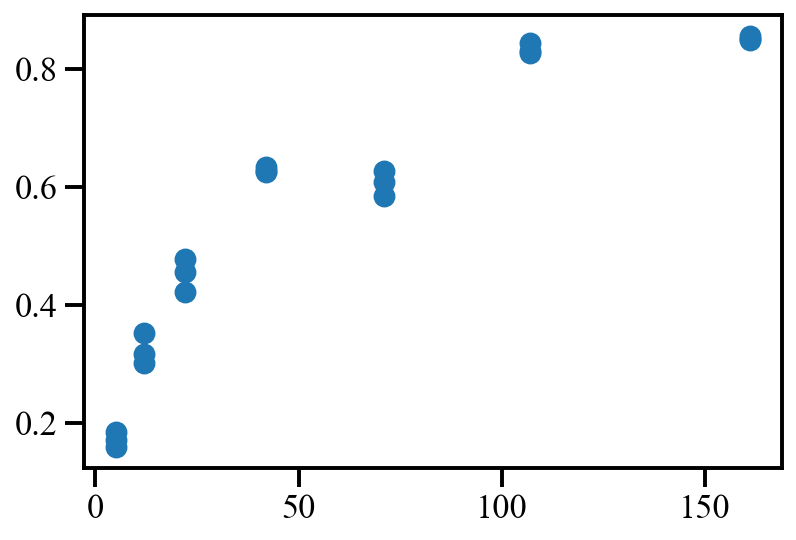

In [ ]:
df = pd.read_csv('../data/dataset.csv', index_col=0)
mask = (df['variable']=='Si') & (df['parameter']=='Oxalic')
t= df.loc[mask, 'days']
A= df.loc[mask, 'value']
plt.scatter(t,A)

The PSO coefficients are K_2 = 0.04084 ± 0.00638 and q_e = 0.967 ± 0.037


UnboundLocalError: local variable 'y_m_pf' referenced before assignment

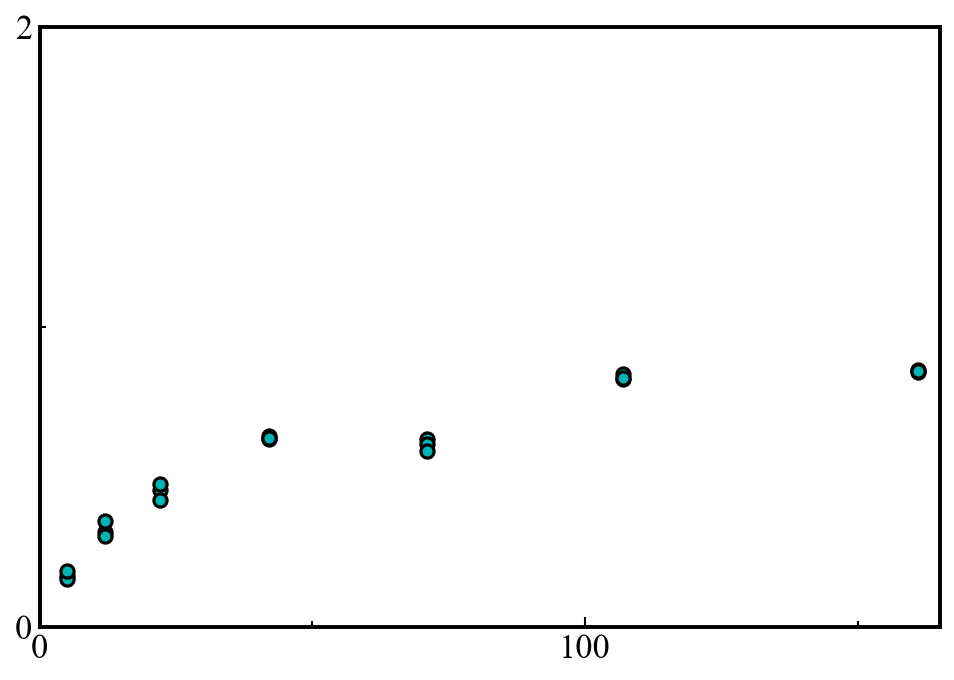

In [ ]:
kinetics(t.values,A.values,Kn_model=pso,
         plot=True,
         comp=True,
         res=False,
         std_res=False)

/var/folders/1f/xyznj37x1n337kxt0v5533rw0000gn/T/ipykernel_41138/2525320745.py:16: RuntimeWarning: overflow encountered in exp
  return a*(1 - np.exp(-b*t))


The PFO coefficients are q_e = 14.267 ± 0.347 and K_1 = 0.011 ± 0.001


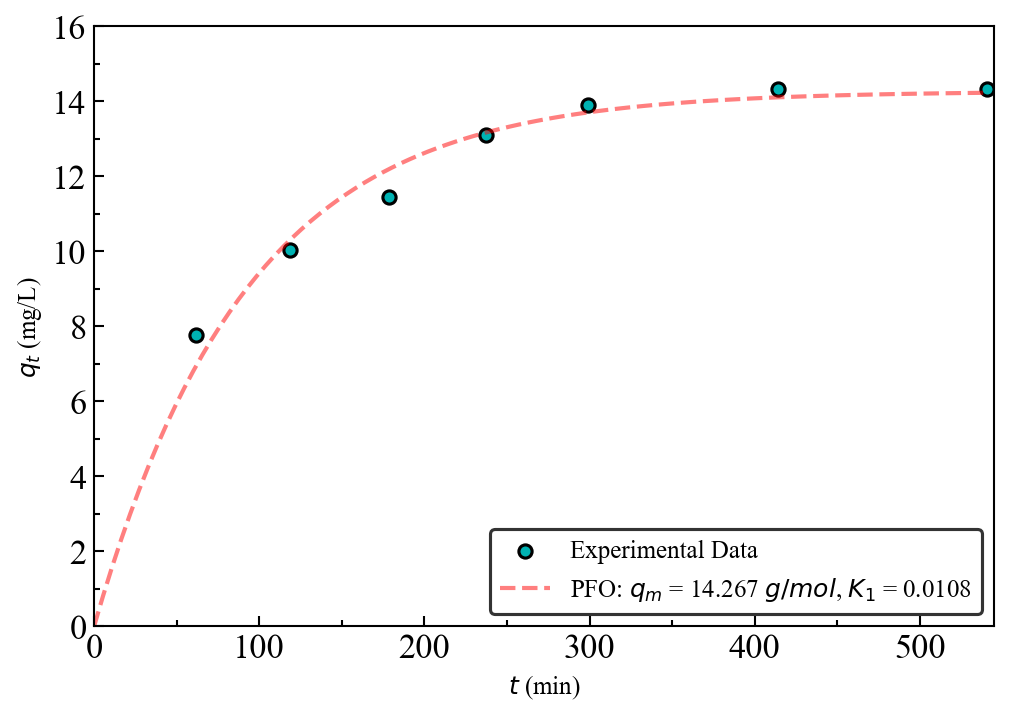

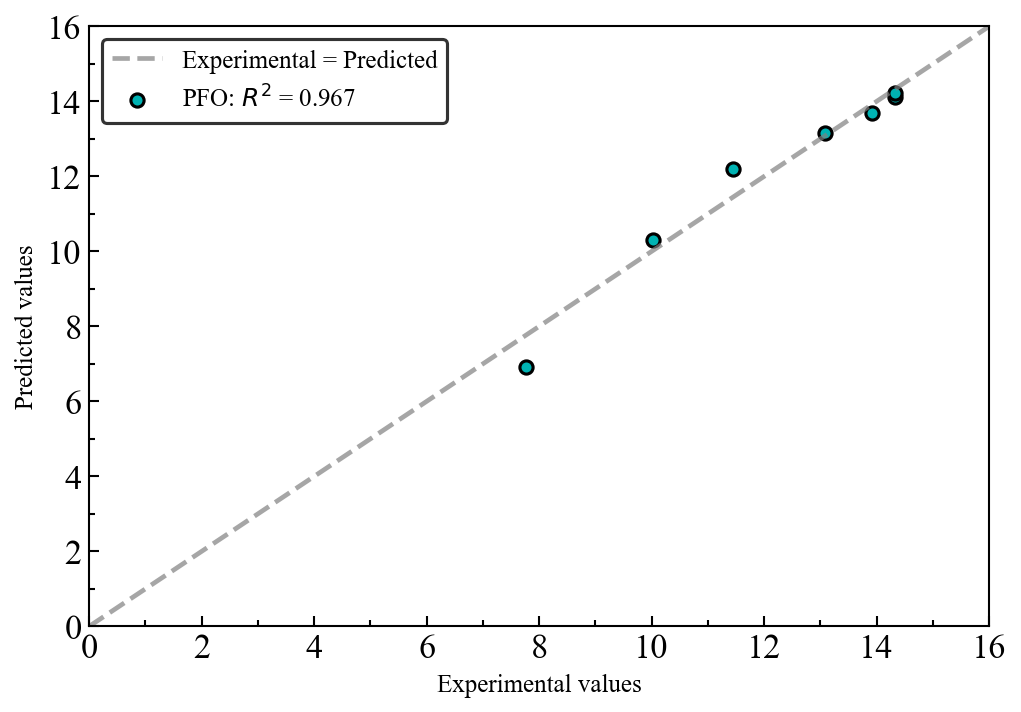

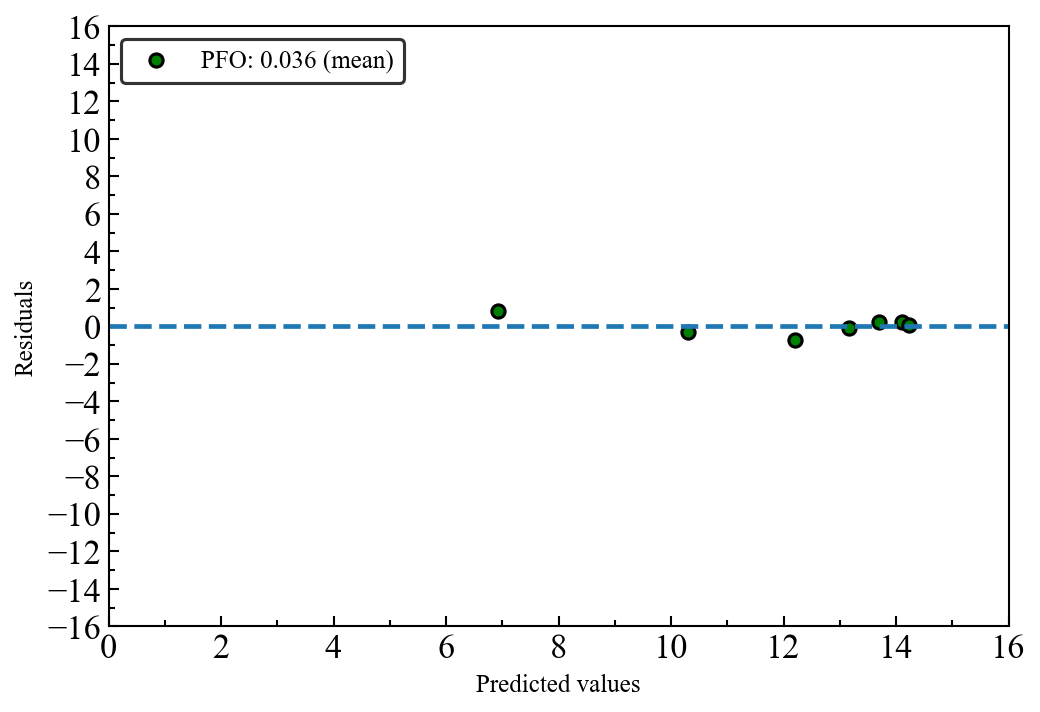

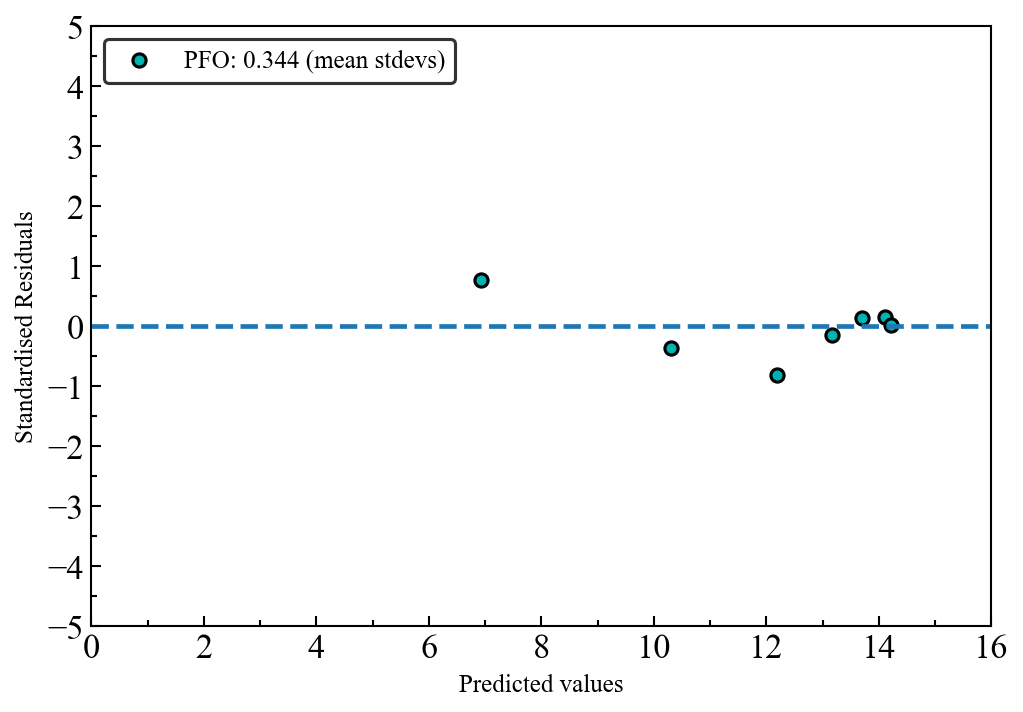

In [ ]:
#   from kinetics import *

x = [61.60,118.84,178.81,237.37,299.17,414.08,540.83]
y = [7.77,10.02,11.45,13.09,13.91,14.32,14.32]

kinetics(x,y,Kn_model=pfo,plot=True,comp=True,res=True,std_res=True)

## Seond 